# Workfile n°2: DCF method - determinants of risk

**Contributors**  
 _Lucchesi Simone Luca_  
 _Gianmarco Cavaliere_

## Summary

- [0)](#intro) Brief introduction 

- [1)](#1) First component of risk: risk-free rate  

    - [1.1)](#1.1) Preliminary imports
    - [1.2)](#1.2) Basic plotting and analytics  
    
- [2)](#2) Second component of risk: market risk premium 
    - [2.1)](#2.1) Historical premiums approach and country risk component
    - [2.2)](#2.2) Our assumptions and analytics 
    - [2.3)](#2.3) Final results: German Risk premium and Italian Risk Premium
    
- [3)](#3) Third component of risk: Beta 
    - [3.1)](#3.1) Historical market betas: use of regression analysis across time series.
    - [3.2)](#3.2) Bottom-up Beta: use of fundamentals
    
- [4)](#4) From cost of equity to cost of capital 
    - [4.1)](#4.1) Cost of debt according to firm ratings 
    - [4.2)](#4.2) Cost of debt net of taxes: marginal tax rate vs effective tax rate. 
    
    
    

### Brief introduction <a name="intro"></a>

In this section we will analyse how to determine a consistent way of measuring risk in firms. 

Risk refers to the likelihood we (as investors) will receive a return on a given investment that is different from the expected one. 

In terms of equity valuation, according to DCF approach, _cost of equity_ is a key ingredient, but it's an implicit cost and can vary across different investors. 

We will focus on a precise _risk and return model_ the _CAPM_. 

**Steps involved** 

1) We will define risk in terms of the distribution of actual returns around an expected return. 

They may be very different from the expected one and this difference will yield risk. The spread is measured by the _variance_ (or std). 

2) We make a diversification between diversifiable and non diversifiable risk. 

In fact, there is firm specific risk (project risk, competitive risk and even sector risk): it affects only a subset of entire firms. 

And market risk: a kind that affects many if not all investments (i.g. an in increase in interest rates). 

Expanding our investment portfolio allows us to diversify it, to reduce the exposure of firm specific risk. In fact, in this way every component will have in percentage a smaller impact on overall return. 

Furthermore, the effects of this kind of risk could be positive or negative: in very large portfolio its average impact will tend to zero. 

In contrast, the effects of market wide movements are likely to be in the same directions. 

3) Assume we are marginal investors. 

The model look at risk through the eyes of the marginal investor: a well diversified agent; the only risk he cares is the risk addesd on to a diversified portfolio, the market risk. 




**Capital asset pricing model: outlines** 

There are different models for measuring market risk, we will use the capital asset pricing model. 

_Key assumptions_: there are no transaction costs and investors have no access to private information (which would allow them to find over and under -valued stocks). This assumes away the reasosn why investors stop diversifying: in this way it ensures investors will keep diversifying until they hold a piece of every traded asset (the market portfolio) and will differ only in terms of how much their wealth they invest in this. 

It follow that the risk of any asset becomes the risk that it adds to the market portfolio: if an asset tends to be correlated with market portfolio in movements (not independent) it will add risk to the market portfolio. 

Statistically, we can measure the risk added by an asset by its covariance with that portfolio: if we standardize this percentage value by dividing with variance of the market portfolio (of the average asset) we will obtain the **Beta**. 



$\beta_{t}$ = $\frac{Cov_{i,m}}{\sigma^2_{m}}$

- Beta represents sintetically the exposure of an asset to all market risk: for example the riskless asset will have beta of 0 (it should have zero variance, actual returns equal to expected ones) 


Obviously does it at a cost: making very restrictive assumptions. 

All the risk models (CAPM, APM and other multi-factor models) assume that only market risk is rewarded deriving the expected return as a function of measures of this risk. 
In fact, the difference between a "simple" CAPM and an APM is given by the fact that in the latter more than one (market) risk sources are assumed (so-called _risk factos_) allowing the analysed asset to have different exposures (betas). 

**Pros** In general, the CAPM (against APM and multi-factor models) has the advantage of being a simpler model to estimate, but it will under perform the richer APM when an investment is sensitive to economic factors not well represented in the market index. 




According to _CAPM_ the cost of equity is given by the following formula:

$E(r_{i})$ = $r_{f}$ +  $\beta_{i}$ $ \times$ $(M_{rp})$ 

As we can see three are the "risk" component to be estimated:

1) $r_{f}$: _risk free rate_ 

2) $M_{rp}$: _market risk premium_ 

3) $\beta_{i}$: _asset beta_. 

---

### First component of risk: risk-free rate <a name="1"></a>

The expected returns on risky investments are measured relative to the risk free rate, with the risk creating an expected premium added as remuneration factor. 

**Risk-free rate components** 

We can define it as the asset of which the investor knows the expected return with certainty (i.e. to have an actual return equal to the expected one). 

For an investment to be risk-free two conditions have to be met: 

- There has to be no default risk 

- There can be no uncertainty about reinvestment rates: no intermediate cash flows. 

Therefore, we must orient towards a government bond (default risk free) no paying cash flows (zero coupon bond). 

According to the _consistency principle_ the risk free rate should be measured consistently with how the cash flows are measured: if the cash flows are nominal the same should be the risk free rate. 

Under conditions of unstable inflation valuation is often done in real terms: cash flows estimated using real growth rates (withoud allowing for the growth that comes from price inflation). In this cases the discount rates should be expressed in real terms as well. 


**Our assumptions** 

1) According to the fact we try to estimate cash flows in nominal terms (euro as currency) we will use nominal risk free rates as well. 

2) We make our computations according to spot rates provided by ECB on AAA government bonds

3) Precisely, we will use German Bunds 10 years spot rates: same currency, no default risk (triple A rating). 

4) Anyway, due to coronavirus crisis we will assume as a risk free proxy the geometric average of daily provided returns (in a year basis) over latest two years. 

--- 

**As always, preliminary imports** <a name="1.1"></a>


In [1]:
import numpy as np 
import pandas as pd 
import os 
import matplotlib.pyplot as plt 
from scipy import stats #this module is needed for geometric mean computations (and not only!)
%matplotlib inline 

In [2]:
def removeFile(fileName):
    """
    removeFile(fileName) function remove file 'fileName', if it exists. It also prints on screen a success/failure message.
    
    Parameters:
        fileName (str): name of the file ('Data' folder is assumed)
        
    Returns:
        None
    """

    if os.path.isfile(os.path.join(dataPath, fileName)):
        os.remove(os.path.join(dataPath, fileName))

        # double-check if file still exists
        fileStillExists = os.path.isfile(os.path.join(dataPath, fileName))

        if fileStillExists:
            print("Failure: file {} still exists...".format(fileName))
        else:
            print("Success: file {} successfully removed!".format(fileName))
            
    else:
        print("File {} already removed.".format(fileName))

In [34]:
dataPath = "./Data set/Dataset for risk"

In [35]:
filePath = os.path.join(dataPath,"10y spotRatesBund past 2 y.csv")

In [36]:
spotRate_df = pd.read_csv(filePath, skiprows = 4, sep=';', index_col = 0, parse_dates = True)

In [37]:
spotRate_df

,[Percent per annum ]
Period\Unit:,
2020-04-29,"-0,412055"
2020-04-28,"-0,372474"
2020-04-27,"-0,355567"
2020-04-24,"-0,362594"
2020-04-23,"-0,335829"
...,...
2018-05-08,"0,611346"
2018-05-07,"0,585991"
2018-05-04,"0,602189"


At this point, the already seen problem comes back again: we must modify the strings values into floating points.

Fortunately, from notebook $n$ °$ 1$ we have a _ready-to-use_ function to solve problems occurred with downloading from Investing. 
One for 

Let's copy it:

In [38]:
def modInvestingComplete(dataFrame): 
   
    import datetime as dt # It can be omitted if preliminary imported
    
    """
    This function  starts modifying the DataFrame index composed by strings starting from element's aspetct 
    (converting dots to minus) and then modifying their order into convention "Y-M-D". Finally, it converts the list into a 
    dateTime object wich will replace the previous index. 
    All in order to have a correct index composed by dates which can be passed to get every useful result. 
     
    
    Then it passes to dataFrame elements removing points and converting commas into points for every dataframe column.
    Thereafter it converts strings to float data type for each element in columns. 
    This is a correction needed to import dataframes from Investing csv's. 
    This is a leaner alternative to previous function, more compact but equally efficient.
    
    modInvesting(dataFrame) function first of all converts index into a list data type,  respectively "." to " " and "," to "." in dataFrames according to American convention. 
    Then it transform each value in each column from strings to float data type. 
    
    Parameter: 
        (dataFrame): dataFrame data structure I imported from Investing.com, each element is a string. 
         
    Results:
        (dataFrame): the same data frame with values converted to make data analysis.  
    """




    strDates = dataFrame.index.tolist()
    
    for i in range(len(strDates)):
        strDates[i] = strDates[i].replace('.','-')
            
    dates = [dt.datetime.strptime(strDates[i], "%d-%m-%Y") for i in range(len(strDates))]
    
    newStrDates = [dt.datetime.strftime(dates[i], "%Y-%m-%d") for i in range (len(dates))]
    
    newDates = [dt.datetime.strptime(newStrDates[i], "%Y-%m-%d") for i in range(len(newStrDates))]

    dataFrame.index = newDates
    
    
    
#With the following command I apply the function lambda to replace points with white bars to all elements of each column
    
    dataFrame = dataFrame.apply(lambda x: x.str.replace(".", ""))
    
#With the following command I apply the function lambda to replace commas with points to all elements of each column
    
    dataFrame = dataFrame.apply(lambda x: x.str.replace(",", "."))
    
#With the following command I apply the function lambda to convert in a numeric format all strings values in each column
    
    dataFrame = dataFrame.apply(pd.to_numeric)
    
#Finally, I can revert the order of rows in dataFrame object
    
    dataFrame = dataFrame.iloc[::-1,::]
    
    
    
    return  dataFrame
    
    

I can obtain now the right dataframe to reload in our machine. 

In [39]:
adjSpotRatePerc_df= modInvestingComplete(spotRate_df)

In [40]:
adjSpotRatePerc_df

,[Percent per annum ]
Period\Unit:,
2018-05-02,0.632955
2018-05-03,0.606465
2018-05-04,0.602189
2018-05-07,0.585991
2018-05-08,0.611346
...,...
2020-04-23,-0.335829
2020-04-24,-0.362594
2020-04-27,-0.355567


In [41]:
pathFile = os.path.join(dataPath, "Adj 10YBund percentual return series past 2y.csv")

In [42]:
adjSpotRatePerc_df.to_csv(pathFile)

In [45]:
removeFile(filePath)

In [46]:
removeFile(pathFile)

--- 

#### Risk free rate: basic plotting and analytics <a name="1.1"></a>

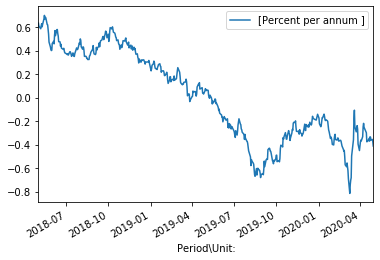

In [47]:
adjSpotRatePerc_df.plot()

Let's try to get a geometric mean over the column values to figure out a good proxy for risk free rate to insert in our model.

We use `stats` module imported from `scipy`library: `.gmean()` function allows us in this case to achieve the goal.


In [48]:
avgRfRate_arr = stats.gmean(adjSpotRatePerc_df +1) -1 

**Comment**: if we try to apply directly to our dataFrame we would get an error related to the argument of logarithm implied in computation, why? 

[Here](https://en.wikipedia.org/wiki/Geometric_mean) an appropriate explanation.

The `.gmean()`function uses the second approach yielding to error when trying to compute logarithm of negative numbers such in second half part of our DataFrame. 

To overcome this problem we sum 1 to every value and at the end we resubtract 1 to get the average return.

**Notice** Due to the fact the rate is already given in percentage form, we must convert it into nominal terms in order to get a reliable result: 

In [49]:
avgRfRate = (avgRfRate_arr[0]) / 100 
avgRfRate

-0.0007208114609529481

This **result** is the **first** key element of _cost of equity_ computation. 

---

### Second component of risk: market risk premium <a name="2"></a>

### What is it? 

The risk premium measures the extra return that would be demanded by investors for shifting from riskless investments to an average risk investment. 

It is function of: 

   **1)** Risk aversion of investors: the higher aversion the higher should be the premium. 
   
   **2)** Riskness of average risk investment: as the perceived riskness of average risk investment increases so should the premium. Notice the so called average risk investment can change over time. 
   
Since each investor is likely to have a different assessment of an acceptable premium, it will be a weighted average of individual's with weights wealth brought to the market. 

### How can I measure it? 

Three are the main ways to estimate it in the CAPM: 

**1)** _Survey premiums_ : one approach is to survey investors about their expectations (mostly portfolio managers). Approach used rarely (no constraints on reasonability, survey premiums very volatile, tend to be short term). 

**2)** _Historical premiums_ : the approach we will consider ( _see below_ ). 

**3)** _Implied equity premium_ : this approach assumes that the overall stock market is correlty priced. Thus, according to a given equity valuation model we would have, as unknown, the cost of equity. Solving for the equation (let's suppose the simplest stable growth model) we will get an implied expected return on the stock: subtracting out the riskfree rate we will obtain our unknown. 



### 2.1) Historical premiums approach (our goal) and country risk premium <a name="2.1"></a> 

The most common approach to estimating risk premium is to base it on historical data. In the CAPM it's computed to be the difference between average returns on stocks and average returns on risk free securities (remark: $\beta$ is assumed to be 1). 

**Estimation issues** 
There are large differences in the actual premiums we could observe being used in practice. 
Different analysts could estimate different premiums with same database of historical returns. 

_Reasons_ 

 **1)**  Time period used: typically are used shorter time periods. The rationale of this choice lays in the fact that risk aversion of the average investor changes over time and more recent time period provides more updated estimate. This at a cost: greater error with short term periods used. 

**2)** Choice of risk free security: for consistency reasons we will consider the same risk free rate obtained for computing expected returns on the stock. 

**3)** Use of arithmetic or geometric averages: to avoid an over-stating of returns from the use of arithmetic averages (due to the fact that returns on stocks are empirically negatively correlated) we will use the geometric approach. 

####  Country risk premium component 

- Italian stock market is a _mature market_: we have a relevant historical background and lots of trades day by day. 

Anyway, the country has a huge public debt which, over the years, has pushed the Country Rating toward BBB (according to S&P rating agency). 

This element must be included: in fact, with respect to a no-default risk government (in our case, according to risk free rates, Germany) the risk premium must be enlarged by this spread; it must capture this additional component of risk.


### 2.2) Assumptions and analytics <a name="2.2"></a>

We will try by using the following **assumptions**: 

**1)** Due to the fact we have considered a German risk-free rate, by consistency we will compute the equity premium in this market and then add it the Italian country risk component. 

**2)** The german risk premium will be computed not with an implied approach but using a time series of "Dax" index over last 5 years (weekly returns then converted into annual nominal returns). 

**3)** We will follow some ready-to-use results (i.e. adjusted country risk premium) we can find in Aswath Damodaran's [database](http://pages.stern.nyu.edu/~adamodar/New_Home_Page/datafile/ctryprem.html). 

Anyway, for consistency reasons we will rely only on country default spread reported in this source computing country default spread over volatilities. 

**4)** **[ Extra, TO DO ]** To encapsulate coronavirus impact we will add a further risk component we will explain at the end. 


--- 

In [3]:
import yfinance as yf 
import json 

Let's try to import dataset from yahoo finance with the usual `.Ticker` method: 

In [6]:
dax = yf.Ticker("^GDAXI")

In [7]:
dataPath = "./Data set/Dataset for risk"

In [19]:
# filePath = os.path.join(dataPath, "dax_index.json")

In [ ]:
# downloadData = True 

In [ ]:
# Not needed 

""""
if downloadData: 
    
    dax_info = dax.info 
     
    with open(filePath ,'w') as file: 
        json.dump(dax_info,file)
    
   
    downloadData = False
    
else: 
   
    with open(filePath, 'r') as file: 
        ftse_info = json.load(file)
""""

In [ ]:
removeFile(filePath)

What is really important for our analysis is to retrieve the historical closure prices to compute logreturns on a weekly base. So:

In [8]:
dax_df = dax.history(period = "max", interval ="1wk")

In [9]:
dax_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1987-12-28,1005.19,1005.19,1005.19,1005.19,0,0,0
1988-01-04,956.49,1026.69,956.49,1026.69,0,0,0
1988-01-11,987.52,987.52,952.46,952.46,0,0,0
1988-01-18,1003.13,1003.13,949.24,966.48,0,0,0
1988-01-25,962.63,968.26,936.00,936.00,0,0,0
...,...,...,...,...,...,...,...
2020-04-13,10733.97,10820.17,10236.24,10625.78,488605100,0,0
2020-04-20,10704.35,10707.31,10249.85,10336.09,535137700,0,0
2020-04-27,10551.07,11235.57,10523.10,10861.64,577110600,0,0


Now we can select only last 5 years, momentaneously neglecting the Coronavirus outbreak months (i.e. from 2015-02-15 to 2020-02-15): 

In [10]:
dax_Newdf = dax_df.loc["2015-02-15":"2020-02-15", "Close"]
dax_Newdf.size 

261

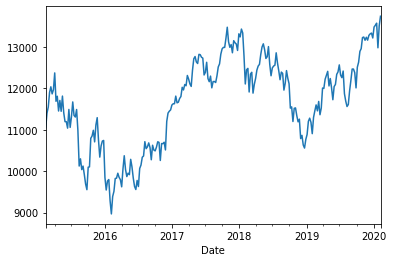

In [11]:
dax_Newdf.plot()

We can serialize this time series in our "Data-set" folder:

In [ ]:
pathFile = os.path.join(dataPath, 'Dax past 2y.csv')

In [ ]:
dax_Newdf.to_csv(pathFile)

In [ ]:
removeFile(pathFile)

Once we have obtained the price time series we should retrieve the returns (on a weekly basis) of this index. We can try with this fast approach: 

In [12]:
dax_t = dax_Newdf 

In [13]:
dax_tm1 = dax_t.shift(periods = 1, freq ="5B")

In [14]:
dax_t

Date
2015-02-16    11050.64
2015-02-23    11401.66
2015-03-02    11550.97
2015-03-09    11901.61
2015-03-16    12039.37
                ...   
2020-01-13    13526.13
2020-01-20    13576.68
2020-01-27    12981.97
2020-02-03    13513.81
2020-02-10    13744.21
Name: Close, Length: 261, dtype: float64

In [15]:
dax_tm1

Date
2015-02-23    11050.64
2015-03-02    11401.66
2015-03-09    11550.97
2015-03-16    11901.61
2015-03-23    12039.37
                ...   
2020-01-20    13526.13
2020-01-27    13576.68
2020-02-03    12981.97
2020-02-10    13513.81
2020-02-17    13744.21
Freq: W-MON, Name: Close, Length: 261, dtype: float64

In [16]:
daxLogRetWK = np.log(dax_t) - np.log(dax_tm1)

In [17]:
daxLogRetWK

Date
2015-02-16         NaN
2015-02-23    0.031271
2015-03-02    0.013010
2015-03-09    0.029904
2015-03-16    0.011508
                ...   
2020-01-20    0.003730
2020-01-27   -0.044792
2020-02-03    0.040151
2020-02-10    0.016906
2020-02-17         NaN
Name: Close, Length: 262, dtype: float64

In [29]:
daxLogRetWK = daxLogRetWK.dropna()
daxLogRetWK

Date
2015-02-23    0.031271
2015-03-02    0.013010
2015-03-09    0.029904
2015-03-16    0.011508
2015-03-23   -0.014309
                ...   
2020-01-13    0.003171
2020-01-20    0.003730
2020-01-27   -0.044792
2020-02-03    0.040151
2020-02-10    0.016906
Name: Close, Length: 260, dtype: float64

Once we have computed weekly log returns of the index we can obtain the mean (weekly) return:

In [30]:
daxAvgLogRetWK = stats.gmean(daxLogRetWK +1) -1 



In [31]:
daxAvgLogRetWK

0.0005624102158106048

Now I set a constant series in order to represent it across a time horizon: 

In [34]:
daxAvgLogRetWK_Series = pd.Series(data = [daxAvgLogRetWK for i in range(daxLogRetWK.size)],
                                         index =daxLogRetWK.index )

To have a graphical comparison: 

Text(0.5, 1.0, 'Comparison between weekly log returns on Dax and their average')

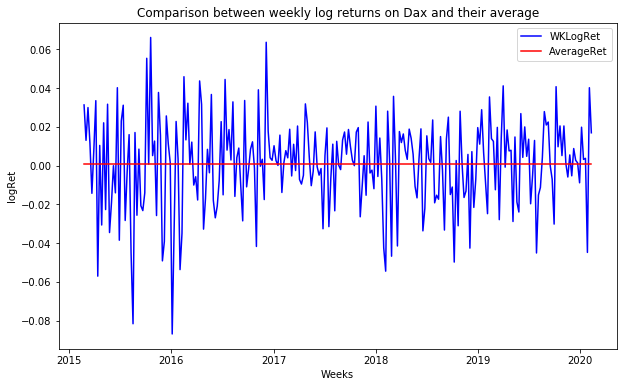

In [35]:
plt.figure(figsize=(10,6))
plt.plot(daxLogRetWK,'b',lw=1.5, label ='WKLogRet')
plt.plot(daxAvgLogRetWK_Series, 'r', lw =1.5, label ='AverageRet')
plt.legend (loc=0)
plt.xlabel('Weeks')
plt.ylabel('logRet')
plt.title('Comparison between weekly log returns on Dax and their average')

<Figure size 720x432 with 0 Axes>

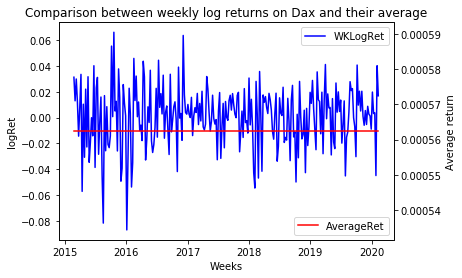

In [36]:
plt.figure(figsize=(10,6))
fig, ax1 = plt.subplots()
plt.plot(daxLogRetWK,'b',lw=1.5, label ='WKLogRet')
plt.legend (loc=0)
plt.xlabel('Weeks')
plt.ylabel('logRet')
plt.title('Comparison between weekly log returns on Dax and their average')

ax2 =ax1.twinx()
plt.plot(daxAvgLogRetWK_Series, 'r', lw =1.5, label ='AverageRet')
plt.ylabel('Average return')
plt.legend (loc=4)

As we can see from the two plottings there are outliers in our computation which reduces the average value for a bit. 

**Last step** to get a proper average risk-premium on a year basis:

In [32]:
daxAvgLogRet = daxAvgLogRetWK*52 #52 business weeks 
print(daxAvgLogRet)

0.02924533122215145


According to the following formula: $E(r_{i})$ = $r_{f}$ +  $\beta_{i}$ $ \times$ $(M_{rp})$ we can get the following inverse equation:  $M_{rp}$ = ( $E(r_{m})$ -  $r_{f}$ )  $\times$ $\frac{1}{\beta_{i}}$

In this case, considering the CAPM directly for the market portfolio we would have a beta equal to 1: therfore the market risk premium will be simply given by the difference across market return and risk-free rate.  


In [86]:
stabMarkRP = (daxAvgLogRet - avgRfRate)*100
print(stabMarkRP)

2.9966142683104398


Now, it remains to add a country risk component to this value to get the market risk premium for our analysis. 

**As said** in point **3** we could use a _ready-to-use_ country risk premium for italian stock market we can easily retrieve from Aswath Damodaran database. 

Anyway, for consistency reasons we should adjust the result according to the following formula: 

_$crp$_ = **$cds$** $\times\frac{\sigma^2_{m}}{\sigma^2_{b}}$

Where _crp_ stands for country risk premium. It's computed rescaling the country default spread (provided by S&P ratings) by a factor given by the ratio between volatility in stock market over volatility in bond market. 

We will assume as proxies respectively _FTSE MIB100_ index and prices of bonds to compute volatilities whereas the country default spread is assumed to be 2.30% (See Damodaran database). 

Let's import the time series of FTSE MIB and starting from 2018 (When S&P classified Italy as BBB) and of "MTS ITALY 10y Government Bonds" a bond index found in Investing.com (a proxy for Italian Bond market). 

In [52]:
dataPath = "./Data set/Dataset for risk"

In [53]:
filePath = os.path.join(dataPath,"MTS Italy 10y Government Bond Dati Storici.csv")

In [54]:
mtsIndBTP = pd.read_csv(filePath, index_col = 0)

In [55]:
mtsIndBTP

,Ultimo,Apertura,Massimo,Minimo,Vol.,Var. %
Data,,,,,,
14.02.2020,"332,25","332,25","332,25","332,25",-,"-0,21%"
13.02.2020,"332,94","332,94","332,94","332,94",-,"0,21%"
12.02.2020,"332,24","332,24","332,24","332,24",-,"0,44%"
11.02.2020,"330,78","330,78","330,78","330,78",-,"-0,21%"
10.02.2020,"331,47","331,47","331,47","331,47",-,"-0,02%"
...,...,...,...,...,...,...
21.02.2018,"285,23","285,23","285,23","285,23",-,"0,09%"
20.02.2018,"284,98","284,98","284,98","284,98",-,"-0,07%"
19.02.2018,"285,19","285,19","285,19","285,19",-,"-0,46%"


Therefore we can apply our "modifier" to clean dataset. 

**Notice** 

- A modification is needed: due to the fact in column `"Volume"` there is a `'-'` we must say to interpreter to modify that value in NAN or to remove it. 

- The same for column `"Var.%"` where the percentage symbol produces an error. 

For our purpose it's easier to remove directly from the "uncleaned" dataFrame object. 

In [ ]:
del mtsIndBTP["Vol."]

In [ ]:
del mtsIndBTP["Var. %"]

Now we apply the ready-to-use function `modInvestingComplete(dataFrame)` in order to obtain a correct dataFrame for our analysis:

In [66]:
adjmtsIndBTP = modInvestingComplete(mtsIndBTP)

In [67]:
adjmtsIndBTP

,Ultimo,Apertura,Massimo,Minimo
2018-02-15,285.00,285.00,285.00,285.00
2018-02-16,286.52,286.52,286.52,286.52
2018-02-19,285.19,285.19,285.19,285.19
2018-02-20,284.98,284.98,284.98,284.98
2018-02-21,285.23,285.23,285.23,285.23
...,...,...,...,...
2020-02-10,331.47,331.47,331.47,331.47
2020-02-11,330.78,330.78,330.78,330.78
2020-02-12,332.24,332.24,332.24,332.24
2020-02-13,332.94,332.94,332.94,332.94


In [18]:
adjmtsIndBTP.to_csv(os.path.join(dataPath, "Adj Mts Ind last 2 y.csv"))

As we can see we have 506 daily values, we are interested in column `"Ultimo"`, we can convert it into a proper time series: 

In [68]:
btpInd_t = adjmtsIndBTP["Ultimo"]

To compute log returns we replay the previous approach with .shift() method:

In [69]:
btpInd_tm1 = btpInd_t.shift(periods = 1, freq = '1B')

In [70]:
dailyLogRet = np.log(btpInd_t) - np.log(btpInd_tm1)
dailyLogRet = dailyLogRet.dropna()

In [71]:
dailyLogRet

2018-02-16    0.005319
2018-02-19   -0.004653
2018-02-20   -0.000737
2018-02-21    0.000877
2018-02-22   -0.001825
                ...   
2020-02-10   -0.000211
2020-02-11   -0.002084
2020-02-12    0.004404
2020-02-13    0.002105
2020-02-14   -0.002075
Name: Ultimo, Length: 497, dtype: float64

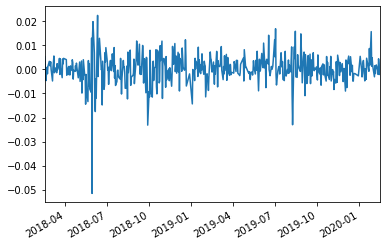

In [72]:
dailyLogRet.plot()

Once we computed them we can easily compute their volatility across the period using Numpy's Universal function:  

In [73]:
dailyMtsVol = np.std(dailyLogRet)

print(dailyMtsVol)

0.005957007184461737


In [74]:
removeFile(filePath)

File ./Data set/Dataset for risk\MTS Italy 10y Government Bond Dati Storici.csv already removed.


**Once** we have computed the denominator of our ratio we can compute the volatility of italian stock market. 

We use a ready file in our data set folder: 

In [75]:
filePath = os.path.join(dataPath, "Adj Ftsemib past 5y.csv")

In [76]:
ftseMib_df = pd.read_csv(filePath, index_col = 0, parse_dates = True)

In [77]:
print(ftseMib_df) 

              Ultimo  Apertura   Massimo    Minimo
2015-01-02  19130.26  19156.72  19246.76  18919.65
2015-01-04  19130.26  19130.26  19130.26  19130.26
2015-01-05  18188.44  18961.03  19190.24  18188.44
2015-01-06  18143.26  18298.26  18523.74  18041.32
2015-01-07  18123.45  18226.43  18478.11  17991.76
...              ...       ...       ...       ...
2020-04-21  16450.85  16811.87  16934.52  16450.85
2020-04-22  16765.28  16615.00  16770.44  16555.34
2020-04-23  17011.11  16925.36  17145.44  16778.15
2020-04-24  16858.89  16640.17  17155.11  16640.17
2020-04-27  17380.21  17313.48  17380.21  17163.85

[1350 rows x 4 columns]


Anyway, for consistency reasons we should cut it to retrieve a smaller sample (precisely from "2018-02-16" to "2020-02-14") over close price column (`"Ultimo"`):  

In [78]:
newFtse_df = ftseMib_df.loc["2018-02-16":"2020-02-14", "Ultimo"]
print(newFtse_df)

2018-02-16    22797.88
2018-02-19    22568.92
2018-02-20    22673.56
2018-02-21    22653.01
2018-02-22    22463.51
                ...   
2020-02-10    24507.70
2020-02-11    24688.89
2020-02-12    24861.28
2020-02-13    24892.15
2020-02-14    24867.01
Name: Ultimo, Length: 503, dtype: float64


Now we can compute log returns over this period (on daily basis as for italian bond market):

In [79]:
ftsePrice_t = newFtse_df

In [80]:
ftsePrice_tm1 = ftsePrice_t.shift(periods = 1, freq = "1B")

In [81]:
print(ftsePrice_tm1)

2018-02-19    22797.88
2018-02-20    22568.92
2018-02-21    22673.56
2018-02-22    22653.01
2018-02-23    22463.51
                ...   
2020-02-11    24507.70
2020-02-12    24688.89
2020-02-13    24861.28
2020-02-14    24892.15
2020-02-17    24867.01
Name: Ultimo, Length: 503, dtype: float64


In [83]:
dailyLogRetFtse = np.log(ftsePrice_t) - np.log(ftsePrice_tm1)
dailyLogRetFtse.dropna()

2018-02-19   -0.010094
2018-02-20    0.004626
2018-02-21   -0.000907
2018-02-22   -0.008401
2018-02-23    0.009245
                ...   
2020-02-10    0.001200
2020-02-11    0.007366
2020-02-12    0.006958
2020-02-13    0.001241
2020-02-14   -0.001010
Name: Ultimo, Length: 492, dtype: float64

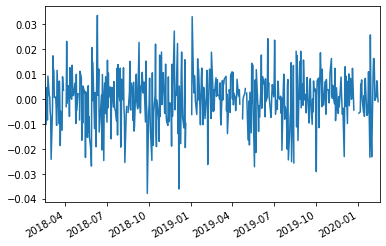

In [84]:
dailyLogRetFtse.plot()

As we can see the daily-volatility was higher during the same time range. 

In [85]:
dailyFtseVol = np.std(dailyLogRetFtse)
dailyFtseVol

0.010413134680690885

### 2.3) Final results: German Risk premium and Italian Risk Premium <a name="2.3"></a>

Finally, we can apply the formula to get an adjusted value of italian country default spread yielding to our desired country risk premium ( $CRP$ ): 

In [88]:
itCDS = 0.023

In [89]:
itCRP =  itCDS * (dailyFtseVol/dailyMtsVol)
itCRP = itCRP*100 

print(itCRP)

4.020510471778644


Approximately a 4 % additional component to add to previous German risk premium in order to get Italian risk premium. 

Therefore, according to previous results, our final result will be the following: 

In [90]:
itRiskPremium = itCRP + stabMarkRP

print(itRiskPremium)

7.017124740089084


Approximately a 7.017%. (Against a 10% from latest updates of Damodaran, it makes sense, we did not consider Coronavirus outbreak) 

--- 

### 3 ) Third component of risk: Beta <a name = "3"></a>

The final set of input we need to put risk and return models into practice are the risk parameters for individiaul assets. 

In the CAPM, the beta of the asset has to be estimated relative to the market portfolio (FTSE MIB index is the proxy in our analysis). 

Two are the main approaches: 

- 1) Historical market betas: conventional approach used by most services and analysts. 

- 2) Bottom-up Beta: alternative and most reliable approach which consists of breaking down beta into its fundamental components. 

### 3.1) Historical market betas: use of regression analysis across time series.  <a name = "3.1" ></a>

This conventional approach consists of using past results to get an accurate approximation of current beta, which as we have already said, represents in one factor the firm exposure to market (non diversifiable) risk. 

**Work around** 

For publicly traded firms it's straightforward to estimate returns an investor would have made on its equity over a given period. 
These returns can be related to a proxy for the market portfolio to get a beta approximation. 

- Standard procedure: regress stock returns (A2A's performance in our case) against market returns (FTSE MIB returns). 

- Regression method: OLS of the form $R_{i}$ = $a$ $+$  $\beta$ $\times$ $R_{m}$

The slope of regression line is the beta of the stock and measures its riskness. Obviously is an estimate which comes with a standard error representing how it is noisy. 

**Our decisions in estimating**

- a) _Length of estimation period_ : we have decided to use latest 10 years as length, excluding the coronavirus outbreak period. 

- b) _Return interval_ : due to trade off between bias in estimations and lack of enough observations we have decided to use weekly returns. 
- c) _Market index proxy_ : as we have already done we continue with FTSE MIB100 index as proxy of portfolio market.  

**A2A weekly prices and returns from Investing.com**

In [166]:
dataPath = "./Data set/Dataset for risk"

In [167]:
filePath = os.path.join(dataPath, "A2A weekly past 10y dirty.csv")

In [168]:
a2aWk = pd.read_csv(filePath, index_col=0)

In [169]:
a2aWk


,Ultimo,Apertura,Massimo,Minimo,Vol.,Var. %
Data,,,,,,
01.03.2020,"1,530","1,597","1,669","1,506","89,07M","-2,86%"
23.02.2020,"1,575","1,798","1,808","1,555","105,67M","-14,91%"
16.02.2020,"1,851","1,851","1,901","1,839","40,91M","0,00%"
09.02.2020,"1,851","1,820","1,863","1,809","44,64M","1,31%"
02.02.2020,"1,827","1,800","1,849","1,792","56,23M","1,39%"
...,...,...,...,...,...,...
31.01.2010,"1,329","1,372","1,408","1,318","55,58M","-3,35%"
24.01.2010,"1,375","1,402","1,416","1,355","46,92M","-2,20%"
17.01.2010,"1,406","1,420","1,462","1,402","38,93M","-0,71%"


In [176]:
del a2aWk["Vol."]

In [179]:
del a2aWk["Var. %"]

In [184]:
adjA2aWkClose = modInvestingComplete(a2aWk).loc["2010-02-15":"2020-02-17", "Ultimo"]

In [202]:
adjA2aWkClose

2010-02-21    1.269
2010-02-28    1.325
2010-03-07    1.346
2010-03-14    1.339
2010-03-21    1.379
              ...  
2020-01-19    1.804
2020-01-26    1.802
2020-02-02    1.827
2020-02-09    1.851
2020-02-16    1.851
Name: Ultimo, Length: 522, dtype: float64

In [203]:
a2aClosePrice_t1 = adjA2aWkClose

In [211]:
a2aClosePrice_tm1 = a2aClosePrice_t1.shift(periods=1, freq = "1w")

In [212]:
a2aClosePrice_tm1 

2010-02-28    1.269
2010-03-07    1.325
2010-03-14    1.346
2010-03-21    1.339
2010-03-28    1.379
              ...  
2020-01-26    1.804
2020-02-02    1.802
2020-02-09    1.827
2020-02-16    1.851
2020-02-23    1.851
Freq: W-SUN, Name: Ultimo, Length: 522, dtype: float64

In [213]:
a2aWkLogRet = np.log(a2aClosePrice_t1) - np.log(a2aClosePrice_tm1)
a2aWkLogRet = a2aWkLogRet.dropna() 

In [214]:
a2aWkLogRet 

2010-02-28    0.043183
2010-03-07    0.015725
2010-03-14   -0.005214
2010-03-21    0.029436
2010-03-28    0.014399
                ...   
2020-01-19    0.011709
2020-01-26   -0.001109
2020-02-02    0.013778
2020-02-09    0.013051
2020-02-16    0.000000
Name: Ultimo, Length: 521, dtype: float64

There is a match with Investing.com results! 

In [215]:
pathFile = os.path.join(dataPath, "A2A wk logRet past 10y.csv")

In [218]:
a2aWkLogRet.to_csv(pathFile)

In [219]:
removeFile(pathFile)

--- 

For what about FTSEMIB we have worked on daily basis until know, therefore there are two alternatives:

**1)** We could apply a **new functionality** to transform it into a weekly basis: `pd.resample()` to proceed with a resampling.  

**2)** We can redownload from our data provider FTSE MIB time series in order to get a larger time series on a weekly basis. 

We have decided to apply solution 2: 

In [3]:
dataPath = "./Data set/Dataset for risk"

In [135]:
filePath = os.path.join(dataPath, "Ftsemib  weekly past 10y dirty.csv")

In [136]:
ftseWK = pd.read_csv(filePath, index_col=0)

In [137]:
ftseWK

,Ultimo,Apertura,Massimo,Minimo,Vol.,Var. %
Data,,,,,,
01.03.2020,"20.799,89","22.333,17","22.361,13","20.624,42","4,09B","-5,39%"
23.02.2020,"21.984,21","23.918,60","24.005,21","21.697,94","4,21B","-11,26%"
16.02.2020,"24.773,15","24.961,76","25.483,05","24.670,24","2,60B","-0,38%"
09.02.2020,"24.867,01","24.437,06","24.983,12","24.388,88","2,03B","1,59%"
02.02.2020,"24.478,32","23.297,09","24.523,42","23.218,72","2,35B","5,34%"
...,...,...,...,...,...,...
31.01.2010,"20.815,88","21.689,12","22.502,60","20.758,32","5,02B","-4,93%"
24.01.2010,"21.896,29","22.373,66","22.672,61","21.478,10","3,90B","-2,98%"
17.01.2010,"22.567,81","23.554,39","23.720,91","22.375,41","3,77B","-3,85%"


In [144]:
del ftseWK["Vol."]

In [145]:
del ftseWK["Var. %"]

In [146]:
adjFtseWK = modInvestingComplete(ftseWK)

In [147]:
adjFtseWK

,Ultimo,Apertura,Massimo,Minimo
2010-01-03,23811.13,23359.89,23911.07,23317.12
2010-01-10,23472.11,23946.44,24058.76,23457.03
2010-01-17,22567.81,23554.39,23720.91,22375.41
2010-01-24,21896.29,22373.66,22672.61,21478.10
2010-01-31,20815.88,21689.12,22502.60,20758.32
...,...,...,...,...
2020-02-02,24478.32,23297.09,24523.42,23218.72
2020-02-09,24867.01,24437.06,24983.12,24388.88
2020-02-16,24773.15,24961.76,25483.05,24670.24
2020-02-23,21984.21,23918.60,24005.21,21697.94


Let's select the same time range we used for A2A prices: 

In [164]:
adjFtseWKClose = adjFtseWK.loc["2010-02-15":"2020-02-17", "Ultimo"]

In [165]:
adjFtseWKClose

2010-02-21    21068.32
2010-02-28    22278.12
2010-03-07    22565.19
2010-03-14    22687.30
2010-03-21    23063.87
                ...   
2020-01-19    23969.13
2020-01-26    23237.03
2020-02-02    24478.32
2020-02-09    24867.01
2020-02-16    24773.15
Name: Ultimo, Length: 522, dtype: float64

In [220]:
ftseWkClose_t = adjFtseWKClose

In [221]:
ftseWkClose_tm1 = ftseWkClose_t.shift(periods = 1, freq = '1w')

In [222]:
ftseWkLogRet = np.log(ftseWkClose_t) -  np.log(ftseWkClose_tm1)
ftseWkLogRet = ftseWkLogRet.dropna()

In [223]:
ftseWkLogRet

2010-02-28    0.055835
2010-03-07    0.012803
2010-03-14    0.005397
2010-03-21    0.016462
2010-03-28    0.006172
                ...   
2020-01-19   -0.007148
2020-01-26   -0.031020
2020-02-02    0.052041
2020-02-09    0.015754
2020-02-16   -0.003782
Name: Ultimo, Length: 521, dtype: float64

--- 

### Linear Regression: OLS 

Once we have obtained aligned time series we can initialize a linear regression to retrieve a regression beta. 

First of all, let's perform a scatter plot to see the presence of correlation: 

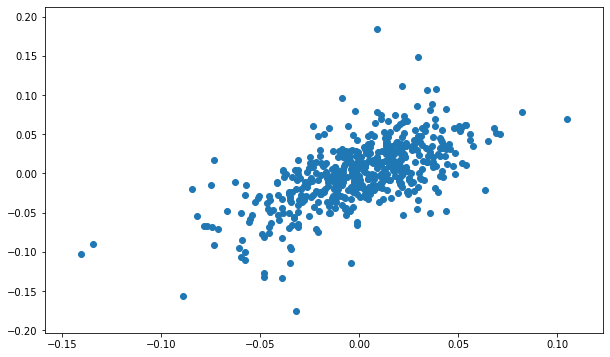

In [224]:
plt.figure(figsize=(10,6))
plt.scatter(ftseWkLogRet, a2aWkLogRet, marker ='o' )

To run a linear regression let's use the following package: `scikit-learn`

In [74]:
from sklearn.linear_model import LinearRegression

Let’s create an instance of the class LinearRegression, which will represent the [regression model](https://realpython.com/linear-regression-in-python/#simple-linear-regression):

In [227]:
model = LinearRegression()

Anyway, it takes in inputs np.arrays so I need to convert my time series. 

Furthermore the following rule must be followed: "Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample".

In [244]:
x = np.array(ftseWkLogRet).reshape((-1,1))

In [ ]:
y = np.array(a2aWkLogRet)

In [242]:
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [251]:
y_pred = model.predict(x)

**Regression results** 

**1)** _Intercept_

In [246]:
model.intercept_

0.0004530917049688054

**2)** _Slope_ = out regression beta

In [249]:
model.coef_

array([0.87311649])

**3)** Graphical representation 

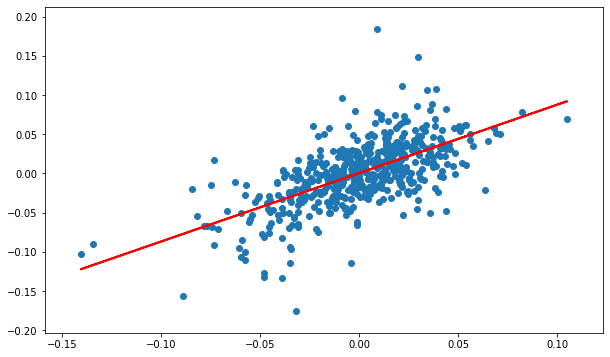

In [252]:
plt.figure(figsize=(10,6))
plt.scatter(ftseWkLogRet, a2aWkLogRet, marker ='o' )
plt.plot(x,y_pred, 'r', lw= 2)

**4)** Goodness of fit: R-squared 

#### Another example: regression agains European stock market index over past 10 years

Let's suppose now we want to regress stock market returns of A2A against a proxy of european stock market, _Euro Stoxx 50_, maintaining the same time range. 

- Why should we use this approach? According to the assumption that we should regress against a likely set of assets we could imagine that our (marginal) average investor is well diversified and active in internationalized European stock market.

This is a good argument to use a proxy representing the average European performance: in fact, the index is compunded by most appetible shares over European scene. 

First of all let's recall our A2A weekly return series from data folder: 

In [4]:
pathFile = os.path.join(dataPath, "A2A wk logRet past 10y.csv")

In [15]:
a2a_wkRet_df = pd.read_csv(pathFile, names = ["Dates", "WkLogret"], parse_dates = True, index_col = 0  )

In [16]:
a2a_wkRet_df

,WkLogret
Dates,
2010-02-28,0.043183
2010-03-07,0.015725
2010-03-14,-0.005214
2010-03-21,0.029436
2010-03-28,0.014399
...,...
2020-01-19,0.011709
2020-01-26,-0.001109
2020-02-02,0.013778


In [17]:
filePath= os.path.join(dataPath, "Euro Stoxx 50 weekly past 10 y dirty.csv") 

In [20]:
euroStox50_df = pd.read_csv(filePath, index_col = 0 )

In [21]:
euroStox50_df

,Ultimo,Apertura,Massimo,Minimo,Vol.,Var. %
Data,,,,,,
01.03.2020,"3.232,07","3.355,33","3.448,24","3.216,44","394,04M","-2,93%"
23.02.2020,"3.329,49","3.762,35","3.762,35","3.283,18","424,44M","-12,39%"
16.02.2020,"3.800,38","3.843,10","3.867,28","3.776,82","207,41M","-1,06%"
09.02.2020,"3.840,97","3.794,18","3.854,43","3.779,10","177,97M","1,12%"
02.02.2020,"3.798,49","3.646,86","3.808,74","3.641,84","226,40M","4,33%"
...,...,...,...,...,...,...
31.01.2010,"2.631,64","2.763,88","2.842,61","2.631,64","642,07M","-5,23%"
24.01.2010,"2.776,83","2.825,15","2.845,15","2.737,33","506,43M","-2,11%"
17.01.2010,"2.836,80","2.949,94","2.990,50","2.806,51","458,00M","-3,52%"


In [30]:
del euroStox50_df["Vol."] 

In [32]:
del euroStox50_df["Var. %"] 

In [35]:
newEuroStox50_df = modInvestingComplete(euroStox50_df)

In [36]:
newEuroStox50_df

,Ultimo,Apertura,Massimo,Minimo
2010-01-03,3017.85,2974.86,3025.60,2974.86
2010-01-10,2940.25,3030.42,3044.37,2939.04
2010-01-17,2836.80,2949.94,2990.50,2806.51
2010-01-24,2776.83,2825.15,2845.15,2737.33
2010-01-31,2631.64,2763.88,2842.61,2631.64
...,...,...,...,...
2020-02-02,3798.49,3646.86,3808.74,3641.84
2020-02-09,3840.97,3794.18,3854.43,3779.10
2020-02-16,3800.38,3843.10,3867.28,3776.82
2020-02-23,3329.49,3762.35,3762.35,3283.18


In [62]:
euroStox50Close = newEuroStox50_df.loc["2010-02-15":"2020-02-17", "Ultimo"]

In [63]:
euroStox50Close

2010-02-21    2728.47
2010-02-28    2877.44
2010-03-07    2898.36
2010-03-14    2897.95
2010-03-21    2940.94
               ...   
2020-01-19    3779.16
2020-01-26    3640.91
2020-02-02    3798.49
2020-02-09    3840.97
2020-02-16    3800.38
Name: Ultimo, Length: 522, dtype: float64

Now we can perform the log return computation with the usual approach: 

In [64]:
euroStox_t = euroStox50Close

In [65]:
euroStox_tm1 = euroStox_t .shift(periods=1, freq ="1w")
print(euroStox_tm1)

2010-02-28    2728.47
2010-03-07    2877.44
2010-03-14    2898.36
2010-03-21    2897.95
2010-03-28    2940.94
               ...   
2020-01-26    3779.16
2020-02-02    3640.91
2020-02-09    3798.49
2020-02-16    3840.97
2020-02-23    3800.38
Freq: W-SUN, Name: Ultimo, Length: 522, dtype: float64


In [66]:
euroStoxWkLogRet = np.log(euroStox_t) - np.log(euroStox_tm1)
euroStoxWkLogRet =euroStoxWkLogRet.dropna()
print(euroStoxWkLogRet)

2010-02-28    0.053160
2010-03-07    0.007244
2010-03-14   -0.000141
2010-03-21    0.014726
2010-03-28    0.012691
                ...   
2020-01-19   -0.007671
2020-01-26   -0.037268
2020-02-02    0.042370
2020-02-09    0.011121
2020-02-16   -0.010624
Name: Ultimo, Length: 521, dtype: float64


In [68]:
filePath = os.path.join(dataPath, "EuroStox wk LogRet past 10y.csv")

In [71]:
euroStoxWkLogRet.to_csv(filePath)

In [72]:
removeFile(filePath)

#### Scatter plot

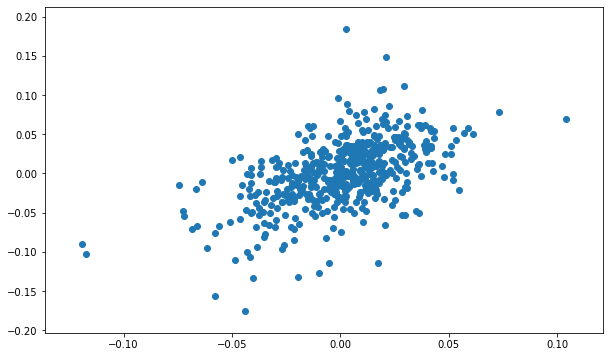

In [73]:
plt.figure(figsize=(10,6))
plt.scatter(euroStoxWkLogRet, a2a_wkRet_df, marker ='o' )

#### Regression 

In [75]:
model = LinearRegression()

In [76]:
x = np.array(euroStoxWkLogRet).reshape((-1,1))
y = np.array(a2a_wkRet_df)

In [77]:
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [78]:
y_pred = model.predict(x)

#### Regression results 

**1)** Intercept

In [79]:
model.intercept_

array([0.00016752])

**2)** Slope = Regression beta 

In [80]:
model.coef_

array([[0.87583609]])

**3)** Goodness of fit: _R-Squared_

**4)** Graphical representation 

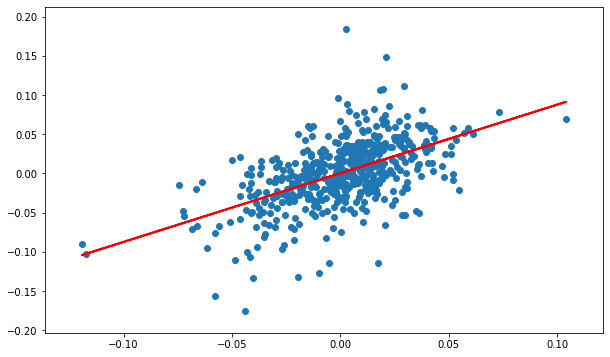

In [81]:
plt.figure(figsize=(10,6))
plt.scatter(euroStoxWkLogRet, a2a_wkRet_df, marker ='o' )
plt.plot(x,y_pred, 'r', lw= 2)

### ETF Approach: utilities ETF (STOXX Europe 600 Utilities)

Let's use now this index to check the trend of A2A against an index for similar businesses. 

In [93]:
filePath = os.path.join(dataPath, "STOXX Europe 600 past 10y dirty.csv")

In [94]:
stoxEu_df = pd.read_csv(filePath,index_col= 0)

In [95]:
stoxEu_df

,Ultimo,Apertura,Massimo,Minimo,Vol.,Var. %
Data,,,,,,
01.03.2020,"379,09","375,03","402,71","368,87","120,04M","1,69%"
23.02.2020,"372,80","407,45","408,73","367,70","136,23M","-9,98%"
16.02.2020,"414,13","404,45","419,02","403,56","73,79M","2,49%"
09.02.2020,"404,08","392,16","404,12","389,85","77,69M","2,93%"
02.02.2020,"392,56","384,34","395,94","382,25","73,82M","2,18%"
...,...,...,...,...,...,...
31.01.2010,"314,49","325,05","331,64","314,32","9,75M","-3,52%"
24.01.2010,"325,96","333,09","333,71","324,75","9,31M","-2,33%"
17.01.2010,"333,72","338,38","344,64","332,57","10,20M","-1,00%"


Usual corrections: 

In [102]:
del stoxEu_df["Vol."]

In [103]:
del stoxEu_df["Var. %"]

In [104]:
newStoxEu_df = modInvestingComplete(stoxEu_df)

In [107]:
stoxEuClose_t = newStoxEu_df.loc["2010-02-15":"2020-02-17", "Ultimo"]

In [108]:
stoxEuClose_t

2010-02-21    319.80
2010-02-28    326.16
2010-03-07    329.78
2010-03-14    327.81
2010-03-21    330.03
               ...  
2020-01-19    386.41
2020-01-26    384.18
2020-02-02    392.56
2020-02-09    404.08
2020-02-16    414.13
Name: Ultimo, Length: 522, dtype: float64

In [110]:
stoxEuClose_tm1=stoxEuClose_t.shift(periods=1, freq = "1w")

In [113]:
stoxEuClose_tm1

2010-02-28    319.80
2010-03-07    326.16
2010-03-14    329.78
2010-03-21    327.81
2010-03-28    330.03
               ...  
2020-01-26    386.41
2020-02-02    384.18
2020-02-09    392.56
2020-02-16    404.08
2020-02-23    414.13
Freq: W-SUN, Name: Ultimo, Length: 522, dtype: float64

In [114]:
stoxEUWkLogRet = np.log(stoxEuClose_t) - np.log(stoxEuClose_tm1) 
stoxEUWkLogRet = stoxEUWkLogRet.dropna()

**Scatter Plot** 

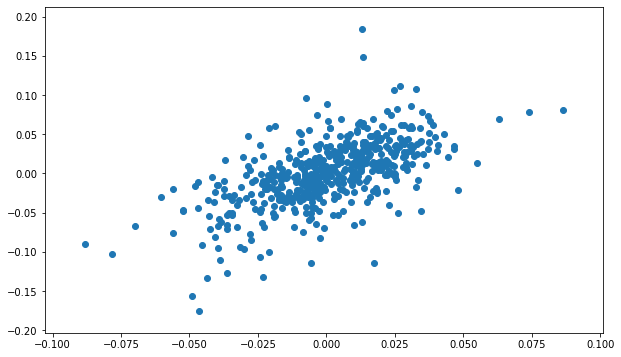

In [115]:
plt.figure(figsize=(10,6))
plt.scatter(stoxEUWkLogRet, a2a_wkRet_df, marker ='o' )

**Regression** 

In [116]:
model = LinearRegression()

In [117]:
x = np.array(stoxEUWkLogRet).reshape((-1,1))
y = np.array(a2a_wkRet_df)

In [118]:
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [119]:
y_pred = model.predict(x)

**1)** Intercept

In [120]:
model.intercept_

array([0.00016472])

**2)** Slope 

In [122]:
model.coef_

array([[1.12842347]])

**3)** Graphical representation

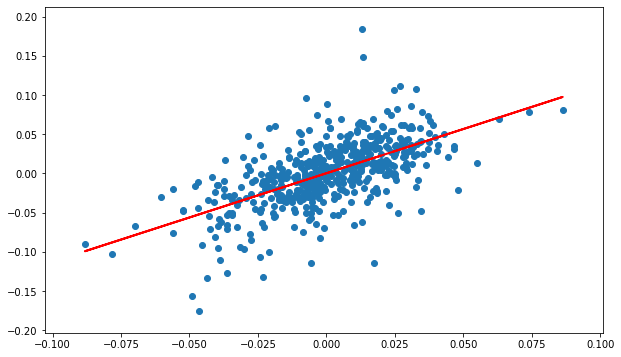

In [123]:
plt.figure(figsize=(10,6))
plt.scatter(stoxEUWkLogRet, a2a_wkRet_df, marker ='o' )
plt.plot(x,y_pred, 'r', lw= 2)

### 3.2) Bottom-up beta: use of fundamentals <a name="3.2"></a>

The beta is determined by fundamental decisions that the firm has made, how much operating leverage to use and the degree of financial leverage settled. 

So, summarizing, the beta is determined by three variables: 

- 1) The type of business or businesses the firm is in 

Since betas measure the risk of a firm relative to a market index, the more sensitive a business is the higher will be its beta. Thus cyclical firms (housing or automotive e.g.) operating in sectors sensitive to economic conditios will have higher betas than companies operating in food or other sectors insensitive to market cycles. 

A2A mainly operates in utilities sector, which is likely to be less sensitive to business cycles than others (Coronavirus notwithstanding). 

- 2) The degree of operating leverage in the firm 

It's a function of the _cost structure_ of a firm . A firm that has high operating leverage (high fixed costs relative to total ones) will have higher variability in operating income and viceversa. 
The higher variance in EBIT will lead to a higher betas (this is a rationale for why small firms should have higher betas with respect to stable ones: niche products and fewer economies of scale). 

 
- 3) The firm's financial leverage 

Ceteris paribus, an increase in financial leverage will increase the **equity beta** (which is different from _asset/unlevered beta_) of a firm: high leverage increases the variance in earnings per share (due to interest payments) making the equity investment riskier. 





The following formula illustrates it: 

**Asset beta as weighted average of "equity Beta" and "beta of Debt"** 

$\beta_{a}$ = $\beta_{e}$ $\times\frac{E}{E+D}$ $+$ $\beta_{d}$ $\times\frac{D}{E+D}$ 

Where $\beta_{a}$ stands for operating beta of the firm, with respect its operativity (type of business, operating leverage). 

If we assume that all of the firm's risk is owned by stockholders (i.e. $\beta_{d}$ = 0 ) and that debt creates a tax benefit ( we substitute D with $D$ $\times$ $(1-t)$ ) we get, solving for equity beta the following formula:  

$\beta_{e}$ = $\beta_{a}$ $\times\frac{D \times (1-t)} {E}$ that is the same as $\beta_{L}$ = $\beta_{U}$ $\times\frac{D \times (1-t)} {E}$

with

- $\beta_{U}$ = **Unlevered beta** of the firm (the beta of the firm without any debt):  it's determined by the types of the businesses in which it operates and its operating leverage. Often, as seen, referred to as the asset beta.


- $\beta_{L}$ = **Levered beta** for equity in the firm : it's determined both by riskness of the business it operates in as well as the amount of financial leverage risk it has taken.  The higher the debt to equity ratio (which captures the financial leverage of the firm) the higher will be the levered beta. 



- $(1-t)$ = the tax shield effect generated at a marginal tax rate 

**Remark** this formalization refers to the hypothesis in which debt has null beta, we can reformulate it assuming a positive value for it from starting equation. 

#### How to break down betas into fundamentals 

Breaking down betas into their business, operating leverage and financial leverage components provides us with an alternative way of estimating betas without using historical returns of that asset. 

According to the following _lemma_ beta of two assets put together is a weighted average of the individual asset betas with weights their market values. Therefore the beta for a firm is a weighted average of betas of all different businesses it operates in. 

**Bottom-up beta work-around** 

1) Identify the business which A2A operates in: we will make our assumptions according to latest consolidated balance sheet [(sec. Business Units pag.50)](http://www.1info.it/PORTALE1INFO/Pdf/Pdf?pdf=86208_oneinfo&data=2020&filetype=documenti&titolo=). 

2) Use sectors average betas: [from Damodaran's database](http://pages.stern.nyu.edu/~adamodar/) we can find useful proxies in order to compute a better Bottom up Beta. **Notice** due to the fact the unlevered beta obtained for a business may be affected by cash holdings of firms in the comparable firms' list we will use the adjusted version for cash. 

3) Unlevered beta of the specific firm: weighted average of the unlevered betas of business it operates in with weights the proportion of firm value derived from each business (we will refer to revenues for every business units). This operation yields to the bottom-up unlevered beta. 

4) According to the current debt to equity ratio for the firm (using market values if available) we can estimate the levered beta for the firm. 





#### Bottom-up levered beta computation 

Assumptions: 

- According to latest discloses most of A2A's results came from: Generation and Trading (inter-sector), Market, Waste and Networks. 

- We make some assumptions with respect each of thre main business units in which we localize 5 main industries: Asset management, Green and renewable energies, environment and waste, utilities (general and water) and gas distribution.
The assumptions are the following: we consider 25 % of all energy from renewable production, we consider revenues values less inter-contribution and associate respectively Generation and Trading to asset management, Waste to waste sector and divide revenues from Market and Networks among remaining industries (25% of energy production is devoted to renewable sector). 

Anyway, given this strictly assumptions we get, probably, an inconsistent result [See Bottom up beta in Simone's part excel worksheet]. 


---

---

### 4) From cost of equity to cost of capital <a name="4"></a>

Most businesses finance some of their operations using debt or hybrids. The cost of these sources are different from cost of equity. 

Cost of capital is the weighted average of the costs of the different components of financing (equity, equity equivalents, debt and debt equivalents). 

**WACC APPROACH** 

We will follow the most widely used approach which involves estimating both costs and taking their weighted average in order to comput the cost of capital of the firm. 

### Cost of debt according to firm ratings <a name = "4.1"></a> 

Cost of debt measures the current cost to the firm of borrowing funds for financing its assets. 
We consider it as a function of default risk that lenders perceive in the firm. 

**Default risk models**

Models of default risk measure the consequences of firm specific _default risk_ , function of the following variables: 

- firm's capacity to generate cash flows from operations 

- its financial oblication, including interest and principal payments

- volatility in its cash flows: the most stability there is in cash flows the lower default risk in the firm. 


**Measuring default risk** 

The most widely used measure of a firm's default risk is its bond rating assigned by ratings agency (i.g. S&P). 

To be consistent with previous analysis we will use S&P rating for A2A which is given by BBB (categorized as investment grade). 

